# Classification

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

plt.rcParams['figure.dpi'] = 100
sns.set_style('darkgrid')

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
type(mnist)

sklearn.utils.Bunch

In [5]:
dir(mnist)

['DESCR', 'categories', 'data', 'details', 'feature_names', 'target', 'url']

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [7]:
mnist.categories

{}

In [8]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [9]:
mnist.data.shape

(70000, 784)

In [10]:
28 * 28

784

In [11]:
X, y = mnist['data'], mnist['target']

In [12]:
X.shape

(70000, 784)

In [13]:
y.shape

(70000,)

In [75]:
# pick a random guy 
first = X[8989]
first = first.reshape(28, 28)

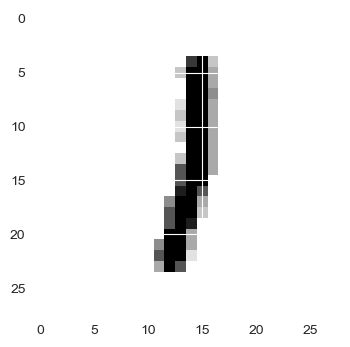

In [76]:
plt.imshow(first, cmap='binary')

In [16]:
y[8989]

'1'

In [17]:
y = y.astype(np.uint8)

In [18]:
y[8989]

1

In [19]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Let's train a binary classifier which identifies '1'

In [20]:
## Convert the data to binary
y_train_1 = y_train == 1
y_test_1 = y_test == 1

In [21]:
from sklearn.linear_model import SGDClassifier

In [22]:
sgd_cls = SGDClassifier(random_state=42)

In [23]:
sgd_cls.fit(X_train, y_train_1)

/Users/skulkarni11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
sgd_cls.predict(X[8989].reshape(1, -1))

array([ True])

In [25]:
y[1231]

7

In [26]:
sgd_cls.predict(X[1231].reshape(1, -1))

array([False])

In [27]:
sgd_cls.classes_

array([False,  True])

In [28]:
sgd_cls.decision_function

<bound method LinearClassifierMixin.decision_function of SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)>

## Let's pick another 

In [29]:
another = X[534]

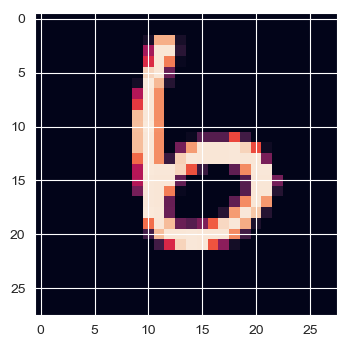

In [77]:
plt.imshow(another.reshape(28, 28))

## Train the model for '6'

In [31]:
y_train_6 = y_train == 6
y_test_6 = y_test == 6

In [32]:
sgd_6 = SGDClassifier(random_state=34)

In [33]:
sgd_6.fit(X_train, y_train_6)

/Users/skulkarni11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=34, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
sgd_6.predict([another])

array([ True])

In [36]:
from sklearn.model_selection import cross_val_score

In [39]:
cross_val_score(sgd_cls, X_train, y_train_1, cv=5, scoring='accuracy')

/Users/skulkarni11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/skulkarni11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/skulkarni11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both

array([0.98975085, 0.98691776, 0.96941667, 0.98383199, 0.99066589])

In [41]:
from sklearn.model_selection import cross_val_predict

In [42]:
y_train_predict_1 = cross_val_predict(sgd_cls, X_train, y_train_1)

/Users/skulkarni11/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/skulkarni11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/skulkarni11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=10

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_train_1, y_train_predict_1)

array([[52996,   262],
       [  370,  6372]])

In [45]:
from sklearn.metrics import precision_score, recall_score

In [46]:
precision_score(y_train_1, y_train_predict_1)

0.960506481760627

In [47]:
recall_score(y_train_1, y_train_predict_1)

0.9451201423909819

In [48]:
from sklearn.metrics import f1_score

In [49]:
f1_score(y_train_1, y_train_predict_1)

0.9527511961722488

In [51]:
sgd_cls.decision_function

<bound method LinearClassifierMixin.decision_function of SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)>

In [50]:
y_train_predict_scores_1 = cross_val_predict(sgd_cls, X_train, y_train_1, method='decision_function')

/Users/skulkarni11/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/skulkarni11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/skulkarni11/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=10

In [54]:
y_train_predict_scores_1

array([ -752488.33167772, -1087209.06961018,  -628194.57166499, ...,
        -453652.91555943,  -626517.33616797,  -707061.65369399])

In [55]:
from sklearn.metrics import precision_recall_curve

In [64]:
precision, recall, thresholds = precision_recall_curve(y_train_1, y_train_predict_scores_1)

In [65]:
thresholds.shape

(38927,)

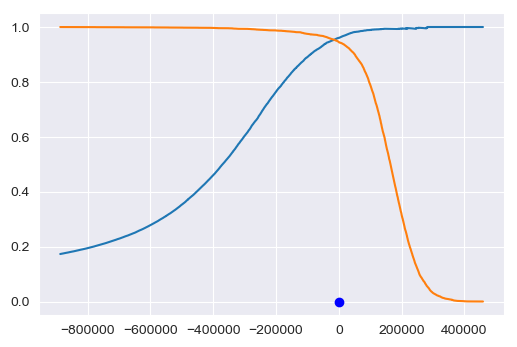

In [74]:
plt.plot(thresholds, precision[:-1])
plt.plot(thresholds, recall[:-1])
plt.plot(precision[-1], recall[-1], 'bo')

In [71]:
precision[-1]

1.0

In [72]:
recall[-1]

0.0

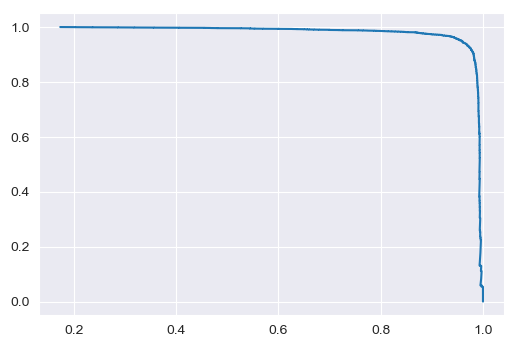

In [78]:
plt.plot(precision, recall)